# 第7章 テキストデータの処理

## 7.2 例題アプリケーション：映画レビューのセンチメント分析

In [1]:
folder='C:\\Users\\nakam\\Python\\Data\\Scikit-Learn\\acllmdb_v1'
import os
os.chdir(folder)
os.listdir()

['cache', 'test', 'train']

In [2]:
#訓練データのロード
from sklearn.datasets import load_files

reviews_train=load_files('train/')
#load_filesは一連の訓練テキストと訓練ラベルを返す
text_train,y_train=reviews_train.data,reviews_train.target

In [3]:
print('type of text_train: {}'.format(type(text_train)))
print('length of text_train: {}'.format(len(text_train)))
print('text_train[1]:\n{}'.format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [4]:
text_train=[doc.replace(b"<br />",b" ") for doc in text_train]

In [5]:
#肯定的、否定的の数
import numpy as np
print('Samples per class (training):{}'.format(np.bincount(y_train)))

Samples per class (training):[12500 12500]


In [6]:
#テストデータのロード
reviews_test=load_files('test/')
text_test,y_test=reviews_test.data,reviews_test.target
print('Number of documents in test data: {}'.format(len(text_test)))
print('Samples per class (test): {}'.format(np.bincount(y_test)))
text_test=[doc.replace(b'<br />)',b' ') for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


## 7.3 Bag of Wordsによるテキスト表現
### 7.3.1 トイデータセットに対するBoW

In [7]:
bards_words=['The fool doth think he is wise,',
            'but the wise man knows himself to be a fool']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
print('Vocabulary size: {}'.format(len(vect.vocabulary_)))
print('Vocabulary content:\n{}'.format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
#BoW表現を作成
bag_of_words=vect.transform(bards_words)
print('bag_of_words:{}'.format(repr(bag_of_words)))

bag_of_words:<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
#疎行列として格納されるので、密行列に復元
print('Dense representation of bag_or_words:\n{}'.format(
bag_of_words.toarray()))

Dense representation of bag_or_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 7.3.2 映画レビューのBoW

In [12]:
vect=CountVectorizer().fit(text_train)
X_train=vect.transform(text_train)
print('X_train:\n{}'.format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
feature_names=vect.get_feature_names()
print('Number of features: {}'.format(len(feature_names)))
print('First 20 features:\n{}'.format(feature_names[:20]))
print('Features 20010 to 20030:\n{}'.format(feature_names[20010:20030]))
print('Every 2000th feature:\n{}'.format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [14]:
#高次元な疎データにはLogisticRegressionのような線形モデルが有効
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores=cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print('Mean cross-validation accuracy: {:.2f}'.format(np.mean(scores)))

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Mean cross-validation accuracy: 0.88


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
#性能が改善できるか見てみる
#トークンとして採用されるために現れるべき単語数を指定
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print('X_train with min_df:{}'.format(repr(X_train)))

X_train with min_df:<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [17]:
feature_names=vect.get_feature_names()

print('First 50 features:\n{}'.format(feature_names[:50]))
print('Features 20010 to 20030:\n{}'.format(feature_names[20010:20030]))
print('Every 700th feature :\n{}'.format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature :
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciat

In [18]:
#性能は向上しなかったが、特徴量が減り、理解しやすくなった
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 7.4 ストップワード

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('NUMBER of stop words: {}'.format(len(ENGLISH_STOP_WORDS)))
print('Every 10th stopword:\n{}'.format(list(ENGLISH_STOP_WORDS)[::10]))

NUMBER of stop words: 318
Every 10th stopword:
['him', 'thence', 'put', 'whenever', 'everything', 'seems', 'and', 'where', 'he', 'take', 'here', 'etc', 'elsewhere', 'hundred', 'much', 'give', 're', 'cant', 'same', 'two', 'already', 'those', 'herself', 'several', 'being', 'was', 'thereafter', 'such', 'always', 'anywhere', 'keep', 'beyond']


In [20]:
#stop_words='english'を指定すると、組み込みのストップワードリストを用いる
#ストップワードリストに単語を追加したり、独自のものを使うこともできる

vect=CountVectorizer(min_df=5,stop_words='english').fit(text_train)
X_train=vect.transform(text_train)
print('X_train with stop words:\n{}'.format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [21]:
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Best cross-validation score: 0.88


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 7.5 tf-idfを用いたデータのスケール変換

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),
                  LogisticRegression())
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Best cross-validation score: 0.89


In [23]:
#tfidfがどの単語を重要と判断したか見る
vectorizer=grid.best_estimator_.named_steps['tfidfvectorizer']
#訓練データセットを変換
X_train=vectorizer.transform(text_train)
#それぞれの特徴量のデータセット中での最大値を見つける
max_value=X_train.max(axis=0).toarray().ravel()
sorted_byidf=max_value.argsort()
feature_names=np.array(vectorizer.get_feature_names())

print('Features with lowest tfidf:\n{}'.format(
feature_names[sorted_byidf[:20]]))

print('Features with highest tfidf:\n{}'.format(
feature_names[sorted_byidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [24]:
#idf(文書頻度の逆数)の小さい単語を見つけることができる

sorted_by_idf=np.argsort(vectorizer.idf_)
print('Features with lowest idf:\n{}'.format(
feature_names[sorted_by_idf][:100]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 7.6 モデル係数の調査

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


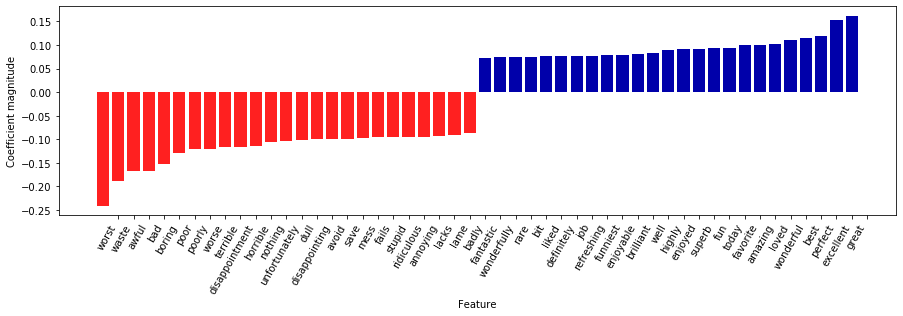

In [25]:
import mglearn
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps['logisticregression'].coef_,
feature_names,n_top_features=25)

## 7.7 1単語よりも大きい単位のBag-of-Words(n-グラム)

In [26]:
#順序が失われてしまうのが問題
#2つの連続するトークンをバイグラムという
#ngra_rangeを設定すると特徴量に採用される

print('bards_words:\n{}'.format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [27]:
cv=CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('Vocabulary size:{}'.format(len(cv.vocabulary_)))
print('Vocabulary:\n{}'.format(cv.get_feature_names()))

Vocabulary size:13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [28]:
cv=CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print('Vocabulary size:{}'.format(len(cv.vocabulary_)))
print('Vocabulary:\n{}'.format(cv.get_feature_names()))

Vocabulary size:14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [29]:
print('Transformed data (dense):\n{}'.format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [30]:
#ユニグラム、バイグラム、トリグラムをbards_wordsに適用
cv=CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print('Vocabulary size:{}'.format(len(cv.vocabulary_)))
print('Vocabulary:\n{}'.format(cv.get_feature_names()))

Vocabulary size:39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [31]:
#レビューデータに対してトリグラムまでを実行する
pipe=make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())
#グリッドが大きく、トリグラムが含まれているので時間がかかる
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10,100],
           'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}

grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print('Best cross-validation score:{:.2f}'.format(grid.best_score_))
print('Best parameters:\n{}'.format(grid.best_params_))

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best cross-validation score:0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


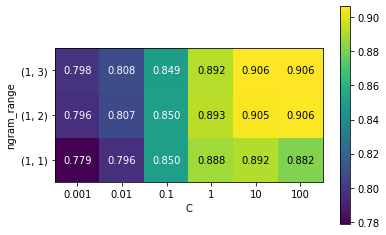

In [32]:
#結果の可視化
import matplotlib.pyplot as plt
%matplotlib inline
#グリッドサーチのスコアを取り出す
scores=grid.cv_results_['mean_test_score'].reshape(-1,3).T
#ヒートマップとして可視化
heatmap=mglearn.tools.heatmap(
scores,xlabel='C',ylabel='ngram_range',cmap='viridis',fmt='%.3f',
xticklabels=param_grid['logisticregression__C'],
yticklabels=param_grid['tfidfvectorizer__ngram_range'])

plt.colorbar(heatmap)

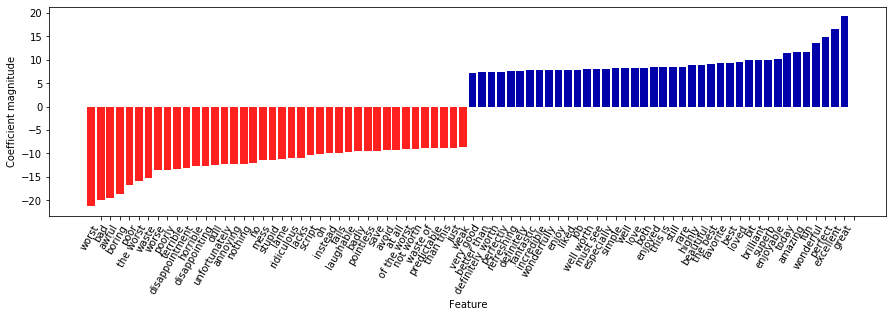

In [33]:
#特徴量の名前と係数を取り出す
vect=grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names=np.array(vect.get_feature_names())
coef=grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names,n_top_features=40)

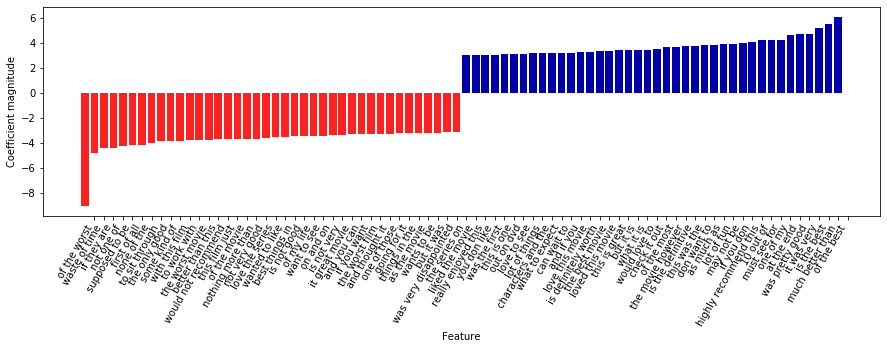

In [34]:
#トリグラム特徴量を見つける
mask=np.array([len(feature.split(' ')) for feature in feature_names])==3
#トリグラム特徴量だけを可視化
mglearn.tools.visualize_coefficients(coef.ravel()[mask],feature_names[mask],n_top_features=40)

## 7.8 より進んだトークン分割、語幹処理、見出し語化

In [118]:
!pip install nltk

In [35]:
import spacy
import nltk

#spacyの英語モデルをロード
en_nlp = spacy.load('en_core_web_sm')

#nltkのPorter stemmerのインスタンスを作成
stemmer=nltk.stem.PorterStemmer()

def compare_normalization(doc):
    #spacyで文書をトークン分割
    doc_spacy=en_nlp(doc)
    #spacyで見つけた見出し語を表示
    print('Lemmatization:')
    print([token.lemma_ for token in doc_spacy])
    #Porter stemmerで見つけたトークンを表示
    print('Steming:')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [36]:
compare_normalization(u"Our meeting today was worse than yesterday,"
                     "I'm scared of meeting the clients tommorow.")

Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', "I'm", 'scared', 'of', 'meet', 'the', 'client', 'tommorow', '.']
Steming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tommorow', '.']


In [42]:
import re
#CountVectorizerで用いられているトークン分割用の正規表現
#regexp used in Count Vectorizer

regexp=re.compile('(?u)\\b\\w\\w+\\b')

#spacyの言語モデルを読み込み、トークン分割器を取り出す
en_nlp = spacy.load('en_core_web_sm')
old_tokenizer=en_nlp.tokenizer
#トークン分割器を先ほどの正規表現で置き換える
en_nlp.tokenizer=lambda string: old_tokenizer.tokens_from_list(
regexp.findall(string))

#spacyの文書処理パイプラインを用いてカスタムトークン分割器を作る
#(正規表現を用いたトークン分割器を組み込んである)
def custom_tokenizer(document):
    doc_spacy=en_nlp(document) #entity,parseは消した
    return [token.lemma_ for token in doc_spacy]

#CountVectorizerをカスタムトークン分割器を使って定義する
lemma_vect=CountVectorizer(tokenizer=custom_tokenizer,min_df=5)

In [39]:
en_nlp = spacy.load('en')

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
!conda install spacy
!python -m spacy.en.download
!python -c "import spacy; spacy.load('en')"

In [44]:
lambda string: old_tokenizer.tokens_from_list(
regexp.findall(string))

<function __main__.<lambda>(string)>

In [43]:
#見だし語化を行うCountVectorizerでtext_trainを変換
X_train_lemma=lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape: {}'.format(X_train_lemma.shape))

#比較のために標準のCountVectorizerでも変換
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print('X_train.shape: {}'.format(X_train.shape))

X_train_lemma.shape: (25000, 21752)
X_train.shape: (25000, 27271)


In [46]:
#データの1%だけを訓練セットとして用いてグリッドサーチを行う
from sklearn.model_selection import StratifiedShuffleSplit

param_grid={'C':[0.001,0.01,0.1,1,10]}
cv=StratifiedShuffleSplit(n_splits=10,test_size=0.99,train_size=0.01,random_state=0)

grid=GridSearchCV(LogisticRegression(),param_grid,cv=cv)

#標準のCountVectorizerを用いてグリッドサーチを実行
grid.fit(X_train,y_train)
print('Best cross-validation score (Standard CountVectorizer): {:.3f}'.format(grid.best_score_))

#見出し語化つきでグリッドサーチを実行
grid.fit(X_train_lemma,y_train)
print('Best cross-validation score (lemmatization): {:.3f}'.format(grid.best_score_))

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Best cross-validation score (Standard CountVectorizer): 0.719


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best cross-validation score (lemmatization): 0.731


C:\Users\nakam\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 7.9 トピックモデリングと文書クラスタリング
### 7.9.1 LDA(Latent Dirichlet Allocation)

In [47]:
#LDA:同時に現れる頻度の高い単語の集合（トピック）を探す

#15%の文書に出てくる単語は取り除く
#それ以外の最もよく現れる10000単語についてBoWモデルを作成
vect=CountVectorizer(max_features=10000,max_df=.15)
X=vect.fit_transform(text_train)

In [53]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10,learning_method='batch',
                             max_iter=25,random_state=0)

#モデルの構築と変換を一度に行うことで時間を節約する
document_topics=lda.fit_transform(X)

In [55]:
#それぞれの単語のトピックに対する重要性を表す
lda.components_

array([[1.00008486e-01, 1.00013189e-01, 2.92462887e+02, ...,
        1.00008441e-01, 1.00001041e-01, 1.00011322e-01],
       [1.00023754e-01, 7.38846180e+01, 1.23643614e+02, ...,
        1.00038364e-01, 1.00008016e-01, 4.10997933e+01],
       [1.54089717e+01, 3.09788112e+01, 8.86029433e+02, ...,
        2.17772720e+00, 1.00006122e-01, 1.00005977e-01],
       ...,
       [1.60452574e-01, 7.44217167e+00, 5.19173853e+01, ...,
        1.00022325e-01, 5.90999435e+01, 1.00012920e-01],
       [1.48224257e+00, 7.02425119e+00, 2.38128005e+02, ...,
        3.60839141e-01, 1.00002324e-01, 1.00000197e-01],
       [2.85702750e+01, 1.17810172e+02, 1.42082626e+02, ...,
        7.78326414e+00, 1.00006686e-01, 1.00002372e-01]])

In [64]:
#それぞれのトピック(components_)の行に対して、特徴量を昇順でソート
#ソートを降順にするために[:,::-1]で行を反転
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
#vectorizerから特徴量名を取得
feature_names=np.array(vect.get_feature_names())

In [58]:
#最初の10トピックを表示
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,
                          sorting=sorting,topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [77]:
#topic100で解析してみる
from sklearn.decomposition import LatentDirichletAllocation
lda100=LatentDirichletAllocation(n_components=100,learning_method='batch',
                             max_iter=25,random_state=0)

#モデルの構築と変換を一度に行うことで時間を節約する
document_topics100=lda100.fit_transform(X)

In [78]:
#面白そうなトピックを選択
topics=np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])
sorting=np.argsort(lda100.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics,feature_names=feature_names,
                          sorting=sorting,topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [84]:
np.argsort(document_topics100[:,45])

array([19936,  1360,  5217, ..., 22224, 21823, 19570], dtype=int64)

In [86]:
#音楽関連トピック45に対する重みでソート
music=np.argsort(document_topics100[:,45])[::-1]
#このトピックを最も重要としている5つの文書を表示
for i in music[:5]:
    #最初の2分を表示
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'


In [93]:
document_topics100

array([[1.72413793e-04, 1.39509726e-01, 1.72413793e-04, ...,
        1.72413793e-04, 1.72413793e-04, 1.72413793e-04],
       [1.78571429e-04, 1.78571429e-04, 1.78571429e-04, ...,
        1.78571429e-04, 1.78571429e-04, 1.78571429e-04],
       [3.57142857e-04, 4.87044523e-01, 3.57142857e-04, ...,
        3.57142857e-04, 3.57142857e-04, 3.57142857e-04],
       ...,
       [1.33333333e-04, 1.33333333e-04, 1.33333333e-04, ...,
        1.33333333e-04, 1.33333333e-04, 1.33333333e-04],
       [1.72413793e-04, 7.11215354e-02, 1.72413793e-04, ...,
        1.58550765e-01, 1.72413793e-04, 1.72413793e-04],
       [7.19424460e-05, 7.19424460e-05, 3.32121130e-02, ...,
        7.19424460e-05, 7.19424460e-05, 7.19424460e-05]])

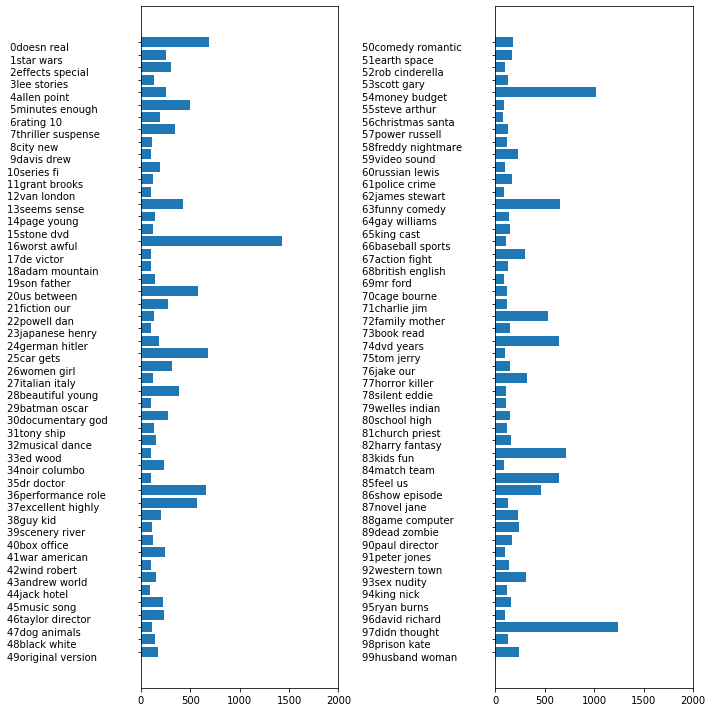

In [95]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
topic_names=["{:>2}".format(i)+" ".join(words)
             for i, words in enumerate(feature_names[sorting[:,:2]])]

#2カラムの棒グラフ
for col in [0,1]:
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50),np.sum(document_topics100,axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end],ha='left',va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax=ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
    